# DUI Analysis in the San Diego Area

In [489]:
# Import pandas, numpy, matplotlib
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from pygeocoder import Geocoder
from geopy.geocoders import Nominatim
from geopy.distance import vincenty
import moment



# Cleaning DUI Arrests Data (2007-2013)

The datafile 'incidents-100k.csv'shows all the police incidents in the San Diego area from 2007-2013. It conatins type of incident, date, and location. We will use this data to identify number of DUI arrests in the San Diego area.

link:
http://data.sandiegodata.org/de/dataset/clarinova_com-crime-incidents-casnd-7ba4-extract

In [323]:
# Pull the comprehensive police reported incidents file, dated from 2007 to 2013.
incidents_180 = pd.read_csv('arrests_180_days.csv')
incidents_180.dropna(inplace=True)
#incidents_180.head(13)

In [324]:
#we want info on just DUI incidents
dui_incidents_180 = incidents_180[incidents_180['Charge_Description_Orig'].str.contains("DUI")]
#df[df.name != 'Tina']
dui_incidents_180 = dui_incidents_180[dui_incidents_180.agency == "SAN DIEGO"]

In [325]:
#lets geocode the addresses to get lon/lat


# Cleaning DUI Crashes Data (2015-2017)

In [326]:
crashes15_17 = pd.read_csv('pd_collisions_datasd.csv')
#crashes15_17.head(5)

In [327]:
#we want info on just DUI incidents
dui_crashes15_17 = crashes15_17[crashes15_17['charge_desc']=='DUI ALCOHOL AND/OR DRUGS']
#dui_crashes15_17.head(5)

In [328]:
#lets get only the data we would potentially use
dui_crashes15_17 = dui_crashes15_17[['date_time','street_no','street_name','street_type','charge_desc']]
#dui_crashes15_17

In [329]:
#all of the addresses are separated, lets combine them into a single string
address = pd.Series(np.zeros(len(dui_crashes15_17)))
for i in range(0, len(dui_crashes15_17)):
    address[i] = (str(dui_crashes15_17['street_no'].iloc[i]) + " " +
                  str(dui_crashes15_17['street_name'].iloc[i]) + " " +
                  str(dui_crashes15_17['street_type'].iloc[i]))
#address
dui_crashes15_17 = dui_crashes15_17.assign(address = address.values)
#2dui_crashes15_17
#Now we got a single string as address


In [330]:
#lets try parsing dates
import dateparser
for i in range(0, len(dui_crashes15_17)):
    timestring = dui_crashes15_17.iloc[0]['date_time']
    result = dateparser.parse(timestring)
    if ((result.year < 2016) and (result.day < 9) and (result.month <12)):
        dui_crashes15_17.drop(dui_crashes15_17.index[i])

len(dui_crashes15_17)
#dui_crashes15_17.head(5)

134

In [331]:
import time
new_crashes = dui_crashes15_17.copy(deep=True)
#new_crashes.head(5)

In [381]:
s = pd.Series(len(dui_crashes15_17), name = 'coordinates')
temp_arr = np.zeros(len(dui_incidents_180),dtype = tuple)
s = pd.Series(temp_arr)
#dui_incidents_180
#temp_arr
#s1 = pd.Series(temp_arr, name = '180_coordinates')
#print(s1[1])

In [384]:
#Next we should use geocoding to get lon/lat of the addresses
print("Geocoding data and writing to file")
"""for i in range(0, len(dui_crashes15_17)): 
    print("trying to geocode on row",i,dui_crashes15_17.iloc[i]['address'])
    while(True):
        print("while")
        try:
            print("try")
            x,y = Geocoder.geocode(dui_crashes15_17.iloc[i]['address']).coordinates
            s[i] = (x,y)
            print("s[i]:",s[i])
        except:
            print("except")
            time.sleep(5)
            continue
        break
    


for i in range(0,len(dui_incidents_180)):
    print("trying to geocode on row",i,":",dui_incidents_180.iloc[i]['BLOCK_ADDRESS'])
    print("outer")
    while(True):
        print("while")
        try:
            print("try")
            x,y = Geocoder.geocode(dui_incidents_180.iloc[i]['BLOCK_ADDRESS']).coordinates
            s1[i] = (x,y)
            s1.to_csv("dui_incidents_180.csv")
            print("s1",s1[i])
        except:
            print("except")
            time.sleep(5)
            continue
        break
"""
#s1[0] = (1,2)
#s1[1] = (1,1)
#s1[2] = (3,1)
# Save new dataframe in file "coordinate_crashes.csv"
# dui_crashes15_17['coordinates'] = s.to_frame()
# new_crashes.to_csv('coordinate_crashes.csv', sep=',')
# crashes = pd.read_csv('coordinate_crashes.csv')
#dui_incidents_180['coordinates'] = s1.to_frame()
#dui_incidents_180['coordinates'].to_csv("dui_incidents_180.csv",sep=',')


Geocoding data and writing to file
trying to geocode on row 0 800 TURQUOISE STREET
while
try
s[i]: (30.0206764, -90.10265509999999)
trying to geocode on row 1 8400 WESTMORE ROAD
while
try
s[i]: (32.9178621, -117.1426708)
trying to geocode on row 2 3000 C STREET
while
try
s[i]: (41.4580185, -96.4925694)
trying to geocode on row 3 3400 COLLEGE AVENUE
while
try
s[i]: (38.9062481, -90.13781209999999)
trying to geocode on row 4 1600 C STREET
while
try
s[i]: (36.077923, -102.519732)
trying to geocode on row 5 300 DEEP DELL ROAD
while
try
s[i]: (32.6972057, -117.032704)
trying to geocode on row 6 3900 WABASH AVENUE
while
try
s[i]: (39.329138, -76.6658593)
trying to geocode on row 7 400 26TH STREET
while
try
s[i]: (43.57653819999999, -83.8954009)
trying to geocode on row 8 3900 05TH AVENUE
while
try
s[i]: (32.7485686, -117.1607796)
trying to geocode on row 9 4400 52ND STREET
while
try
s[i]: (38.53423, -121.445897)
trying to geocode on row 10 4500 OREGON STREET
while
try
s[i]: (32.7591577, -117

KeyboardInterrupt: 

In [383]:
s.to_csv('crash_coordinates.csv')
temp_df = pd.read_csv('dui_incidents_180.csv')

#for i in range(0,455):
#    dui_incidents_180.set_value(i,'coordinates',temp_df.iloc[i]['coordinates'])
#dui_incidents_180.dropna(inplace=True)

#dui_incidents_180['coordinates'] = pd.read_csv("dui_incidents_180.csv")

# Cleaning Alchohol Permits Data

In [ ]:
alc_permits = pd.read_csv('abs-licenses-casnd.csv')
crash_coordinates_s = pd.read_csv("crash_coordinates.csv")
#alc_permits.head(5)
crash_coordinates_s.head(5)

In [340]:
# Reduce to pertinent data columns
alc_permits = alc_permits[['last_date', 'status', 'issuedate', 'exprdate', 'lon', 'lat', 'business']]

In [341]:
alc_permits.head(5)

,last_date,status,issuedate,exprdate,lon,lat,business
0,2013-07-09T,ACTIVE,1951-07-20T,2014-03-31T,-117.248361,32.777847,NaN
1,2013-07-09T,ACTIVE,1978-06-05T,2014-04-30T,-117.123423,32.916755,Capriccio Italian Restaurant
2,2013-07-09T,ACTIVE,1964-08-18T,2013-09-30T,-117.113723,32.701524,Ocean View Liquor
3,2013-07-09T,ACTIVE,1978-01-01T,2013-08-31T,-117.117612,32.749524,Market Place The
4,2013-07-09T,ACTIVE,1977-05-18T,2014-03-31T,-117.236281,32.800508,Silver Fox Associates Inc


In [342]:
# Filter out data that may be outside the San Diego area.
# Limit range so that any outliers or typos in data are eliminated

alc_permits = alc_permits.drop(alc_permits[alc_permits['lon'] < -120].index)
alc_permits.dropna(inplace = True)

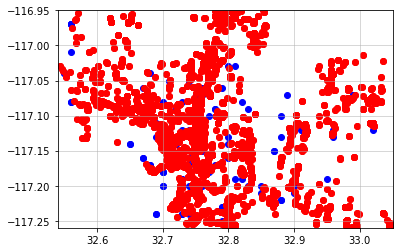

In [343]:
#Alcohol Permits SCATTER PLOTTING

coords = np.zeros(len(alc_permits), dtype=('2float'))

for i in range(0, len(alc_permits)):
    alc_lat = float(alc_permits['lat'].iloc[i])
    alc_lng = float(alc_permits['lon'].iloc[i])
    coords[i] = (alc_lat, alc_lng)

plt.scatter(coords[:,0], coords[:,1], c='red')
# Turn on the grid
plt.grid(linewidth='.5')
plt.show()

# Visualizing Our Data

In [344]:
#DUI Arrests SCATTER PLOTTING

coords = np.zeros(len(dui_incidents_180), dtype=('2float'))
"""
for i in range(0, len(dui_incidents_180)):
    #print("break")
    while(True):
        try:
            #print("try")
            dui_lat,dui_lng = Geocoder.geocode(dui_incidents_180.iloc[i]['BLOCK_ADDRESS']).coordinates
            coords[i] = (dui_lat, dui_lng)
        except:
            #print("except")
            time.sleep(5)
            continue
        break

plt.scatter(coords[:,0], coords[:,1], c='blue')
# Turn on the grid
plt.grid(linewidth='0.5')
plt.show()

"""

'\nfor i in range(0, len(dui_incidents_180)):\n    #print("break")\n    while(True):\n        try:\n            #print("try")\n            dui_lat,dui_lng = Geocoder.geocode(dui_incidents_180.iloc[i][\'BLOCK_ADDRESS\']).coordinates\n            coords[i] = (dui_lat, dui_lng)\n        except:\n            #print("except")\n            time.sleep(5)\n            continue\n        break\n\nplt.scatter(coords[:,0], coords[:,1], c=\'blue\')\n# Turn on the grid\nplt.grid(linewidth=\'0.5\')\nplt.show()\n\n'

In [345]:
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans2, whiten

Length of dui_incidents7_13 dataframe:  4480
Centroids:  [[  179.20048729 -1077.98487057]
 [  179.1356518  -1076.58465373]
 [  181.07001695 -1078.37879902]]


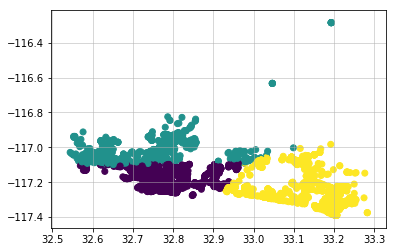

In [514]:
# 1. DUI CLUSTERING
# K-means clustering of hottest parking meters
# Determine whether bus and meter clusters have similar epicenters

# First cluster DUI arrests coordinates.
#coords = np.zeros(len(dui_incidents7_13), dtype=('2float'))

#for i in range(0, len(dui_incidents7_13)):
#    dui_lat = float(dui_incidents7_13['lat'].iloc[i])
#    dui_lng = float(dui_incidents7_13['lon'].iloc[i])
#    coords[i] = (dui_lat, dui_lng)

print("Length of dui_incidents7_13 dataframe: ",len(coords))

x, y = kmeans2(whiten(coords), 3, iter = 20)  
print("Centroids: ",x)

plt.scatter(coords[:,0], coords[:,1], c=y);
plt.grid(linewidth='0.5')
plt.show()



In [513]:
zip_code_df = pd.read_csv('ZipCode_Populations.csv')


In [348]:
curr_zip = zip_code_df['Zip'][0]

sums = {}
temp_sum = 0

for i in range(0,len(zip_code_df)):    
    if curr_zip != zip_code_df.iloc[i]['Zip']:
        sums[curr_zip] = temp_sum
        curr_zip = zip_code_df.iloc[i]['Zip']
        temp_sum = zip_code_df.iloc[i]['NUMBER']
    else:
        temp_sum += zip_code_df.iloc[i]['NUMBER']

In [512]:
df_zip_coords = pd.read_csv('Zip_Coords.csv')


In [511]:
crash_coords_df = s.to_frame()
crash_coords_arr = np.zeros(134, dtype=('2float'))

for i in range(0,134):
    coord = str(crash_coords_df.iloc[i])
    opening_paren_index = coord.find("(")
    comma_index = coord.find(",")
    closing_paren_index = coord.find(")")
    crash_lat = float(coord[opening_paren_index+1:comma_index])
    crash_lng = float(coord[comma_index+1:closing_paren_index])
    crash_coords_arr[i] = ((crash_lat,crash_lng))

#do the same for dui_incidents_180 df
dui_incidents_arr = np.zeros(456,dtype=('2float'))
temp_df = pd.read_csv('dui_incidents_180.csv')
for i in range(0,455):
    coord = str(temp_df.iloc[i])
    opening_paren_index = coord.find("(")
    comma_index = coord.find(",")
    closing_parn_index = coord.find(")")
    crash_lat = float(coord[opening_paren_index+1:comma_index])
    crash_lng = float(coord[comma_index+2:closing_parn_index])
    dui_incidents_arr[i] = ((crash_lat,crash_lng))


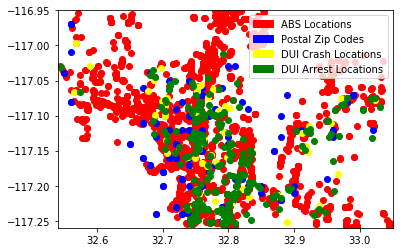

In [509]:
#for key in sums:

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlim(32.54,33.05)
ax1.set_ylim(-117.26,-116.95 )

#Zip coordinates
zip_coordinates = np.zeros(len(df_zip_coords), dtype=('2float'))

for i in range(0,len(df_zip_coords)):
    zip_lat = float(df_zip_coords.iloc[i]['Lat'])
    zip_lng = float(df_zip_coords.iloc[i]['Lon']) 
    zip_coordinates[i] = (zip_lat,zip_lng)
    
#Alcohol Permits SCATTER PLOTTING

coords = np.zeros(len(alc_permits), dtype=('2float'))

for i in range(0, len(alc_permits)):
    alc_lat = float(alc_permits['lat'].iloc[i])
    alc_lng = float(alc_permits['lon'].iloc[i])
    coords[i] = (alc_lat, alc_lng)
        
coords = coords[0:len(coords)-2]
ax1.scatter(coords[:,0], coords[:,1], c='red')
ax1.scatter(zip_coordinates[:,0],zip_coordinates[:,1], c='blue')
ax1.scatter(crash_coords_arr[:,0],crash_coords_arr[:,1], c='yellow')
ax1.scatter(dui_incidents_arr[:,0],dui_incidents_arr[:,1],c='green')

#create legend
red_dots = mpatches.Patch(color='red',label='ABS Locations')
blue_dots = mpatches.Patch(color='blue',label='Postal Zip Codes')
yellow_dots = mpatches.Patch(color='yellow',label='DUI Crash Locations')
green_dots = mpatches.Patch(color='green',label='DUI Arrest Locations')

plt.legend(handles=[red_dots,blue_dots,yellow_dots,green_dots])

# Turn on the grid
#plt.grid(linewidth='1.0')
plt.show()
